In [1]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/datasets'

/content/drive/MyDrive/datasets


In [3]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 24.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

# Train

In [ ]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
results = model.train(data="data.yaml", epochs=10)  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

# Validate

In [4]:
# Load the trained model
# model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/drive/MyDrive/datasets/runs/detect/train13/weights/best.pt') # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.73 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3013448 parameters, 0 gradients, 8.1 GFLOPs
100%|██████████| 755k/755k [00:00<00:00, 116MB/s]
val: Scanning /content/drive/MyDrive/datasets/valid/labels.cache... 2849 images, 4 backgrounds, 40 corrupt: 100%|██████████| 2849/2849 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 179/179 [02:01<00:00,  1.47it/s]
                   all       2849       4559      0.256      0.129     0.0983     0.0581
                   A10       2849         66     0.0814      0.136     0.0455     0.0279
                 A400M       2849         45          1          0     0.0277     0.0188
                 AG600       2849         28          1          0      0.044     0.0352
                    B1       2849         61      0.134      0.115     0.0622     0.0466
                    B2       2849         44  

array([    0.02793,    0.018795,    0.035245,    0.046629,    0.027137,    0.020773,    0.017605,    0.026748,   0.0084822,    0.026316,    0.022268,    0.048842,   0.0073173,     0.02879,    0.032589,      0.0335,    0.035273,    0.017622,    0.028096,     0.03219,    0.014217,    0.059217,    0.037261,    0.027331,
          0.028645,   0.0065665,     0.01429,   0.0066936,     0.01862,    0.017868,    0.010621,    0.011763,    0.045344,    0.061321,   0.0080552,    0.020675,     0.21492,     0.43477,      0.4534,     0.28946])

# Predict

In [6]:
# Predict with the model
results = model('https://makezine.com/wp-content/uploads/2020/06/PaperPlane-14a-IMG_1507.jpg')  # paper airplane


100%|██████████| 82.9k/82.9k [00:00<00:00, 1.26MB/s]
image 1/1 /content/drive/MyDrive/datasets/PaperPlane-14a-IMG_1507.jpg: 448x640 (no detections), 65.3ms
Speed: 0.6ms preprocess, 65.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


In [7]:
model('https://images.dassault-aviation.com/f_auto,q_auto,g_center,dpr_auto/wp-auto-upload/2/files/2022/01/DA00044762_S.jpg') # Mirage 2000


100%|██████████| 103k/103k [00:00<00:00, 203kB/s] 
image 1/1 /content/drive/MyDrive/datasets/DA00044762_S.jpg: 448x640 2 p-airplanes, 9.7ms
Speed: 0.7ms preprocess, 9.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.yolo.engine.results.Results object with attributes:
 
 _keys: ('boxes', 'masks', 'probs', 'keypoints')
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'A10', 1: 'A400M', 2: 'AG600', 3: 'B1', 4: 'B2', 5: 'B52', 6: 'Be200', 7: 'C130', 8: 'C17', 9: 'C5', 10: 'E2', 11: 'EF2000', 12: 'F117', 13: 'F14', 14: 'F15', 15: 'F16', 16: 'F18', 17: 'F22', 18: 'F35', 19: 'F4', 20: 'J20', 21: 'JAS39', 22: 'MQ9', 23: 'Mig31', 24: 'Mirage2000', 25: 'RQ4', 26: 'Rafale', 27: 'SR71', 28: 'Su57', 29: 'Tu160', 30: 'Tu95', 31: 'U2', 32: 'US2', 33: 'V22', 34: 'XB70', 35: 'YF23', 36: 'bird', 37: 'c-helicopter', 38: 'drone', 39: 'p-airplane'}
 orig_img: array([[[224, 215, 206],
         [224, 215, 206],
         [224, 215, 206],
         ...,
         [221, 208, 200],
         [222, 209, 201],
         [222, 209, 201]],
 
        [[224, 215, 206],
         [224, 215, 206],
         [224, 215, 206],
         ...,
         [221, 208, 200],

# Plots

The model has a peak F1 score of of 0.08 at 0.050 (super poor but only did 10 epochs for now)

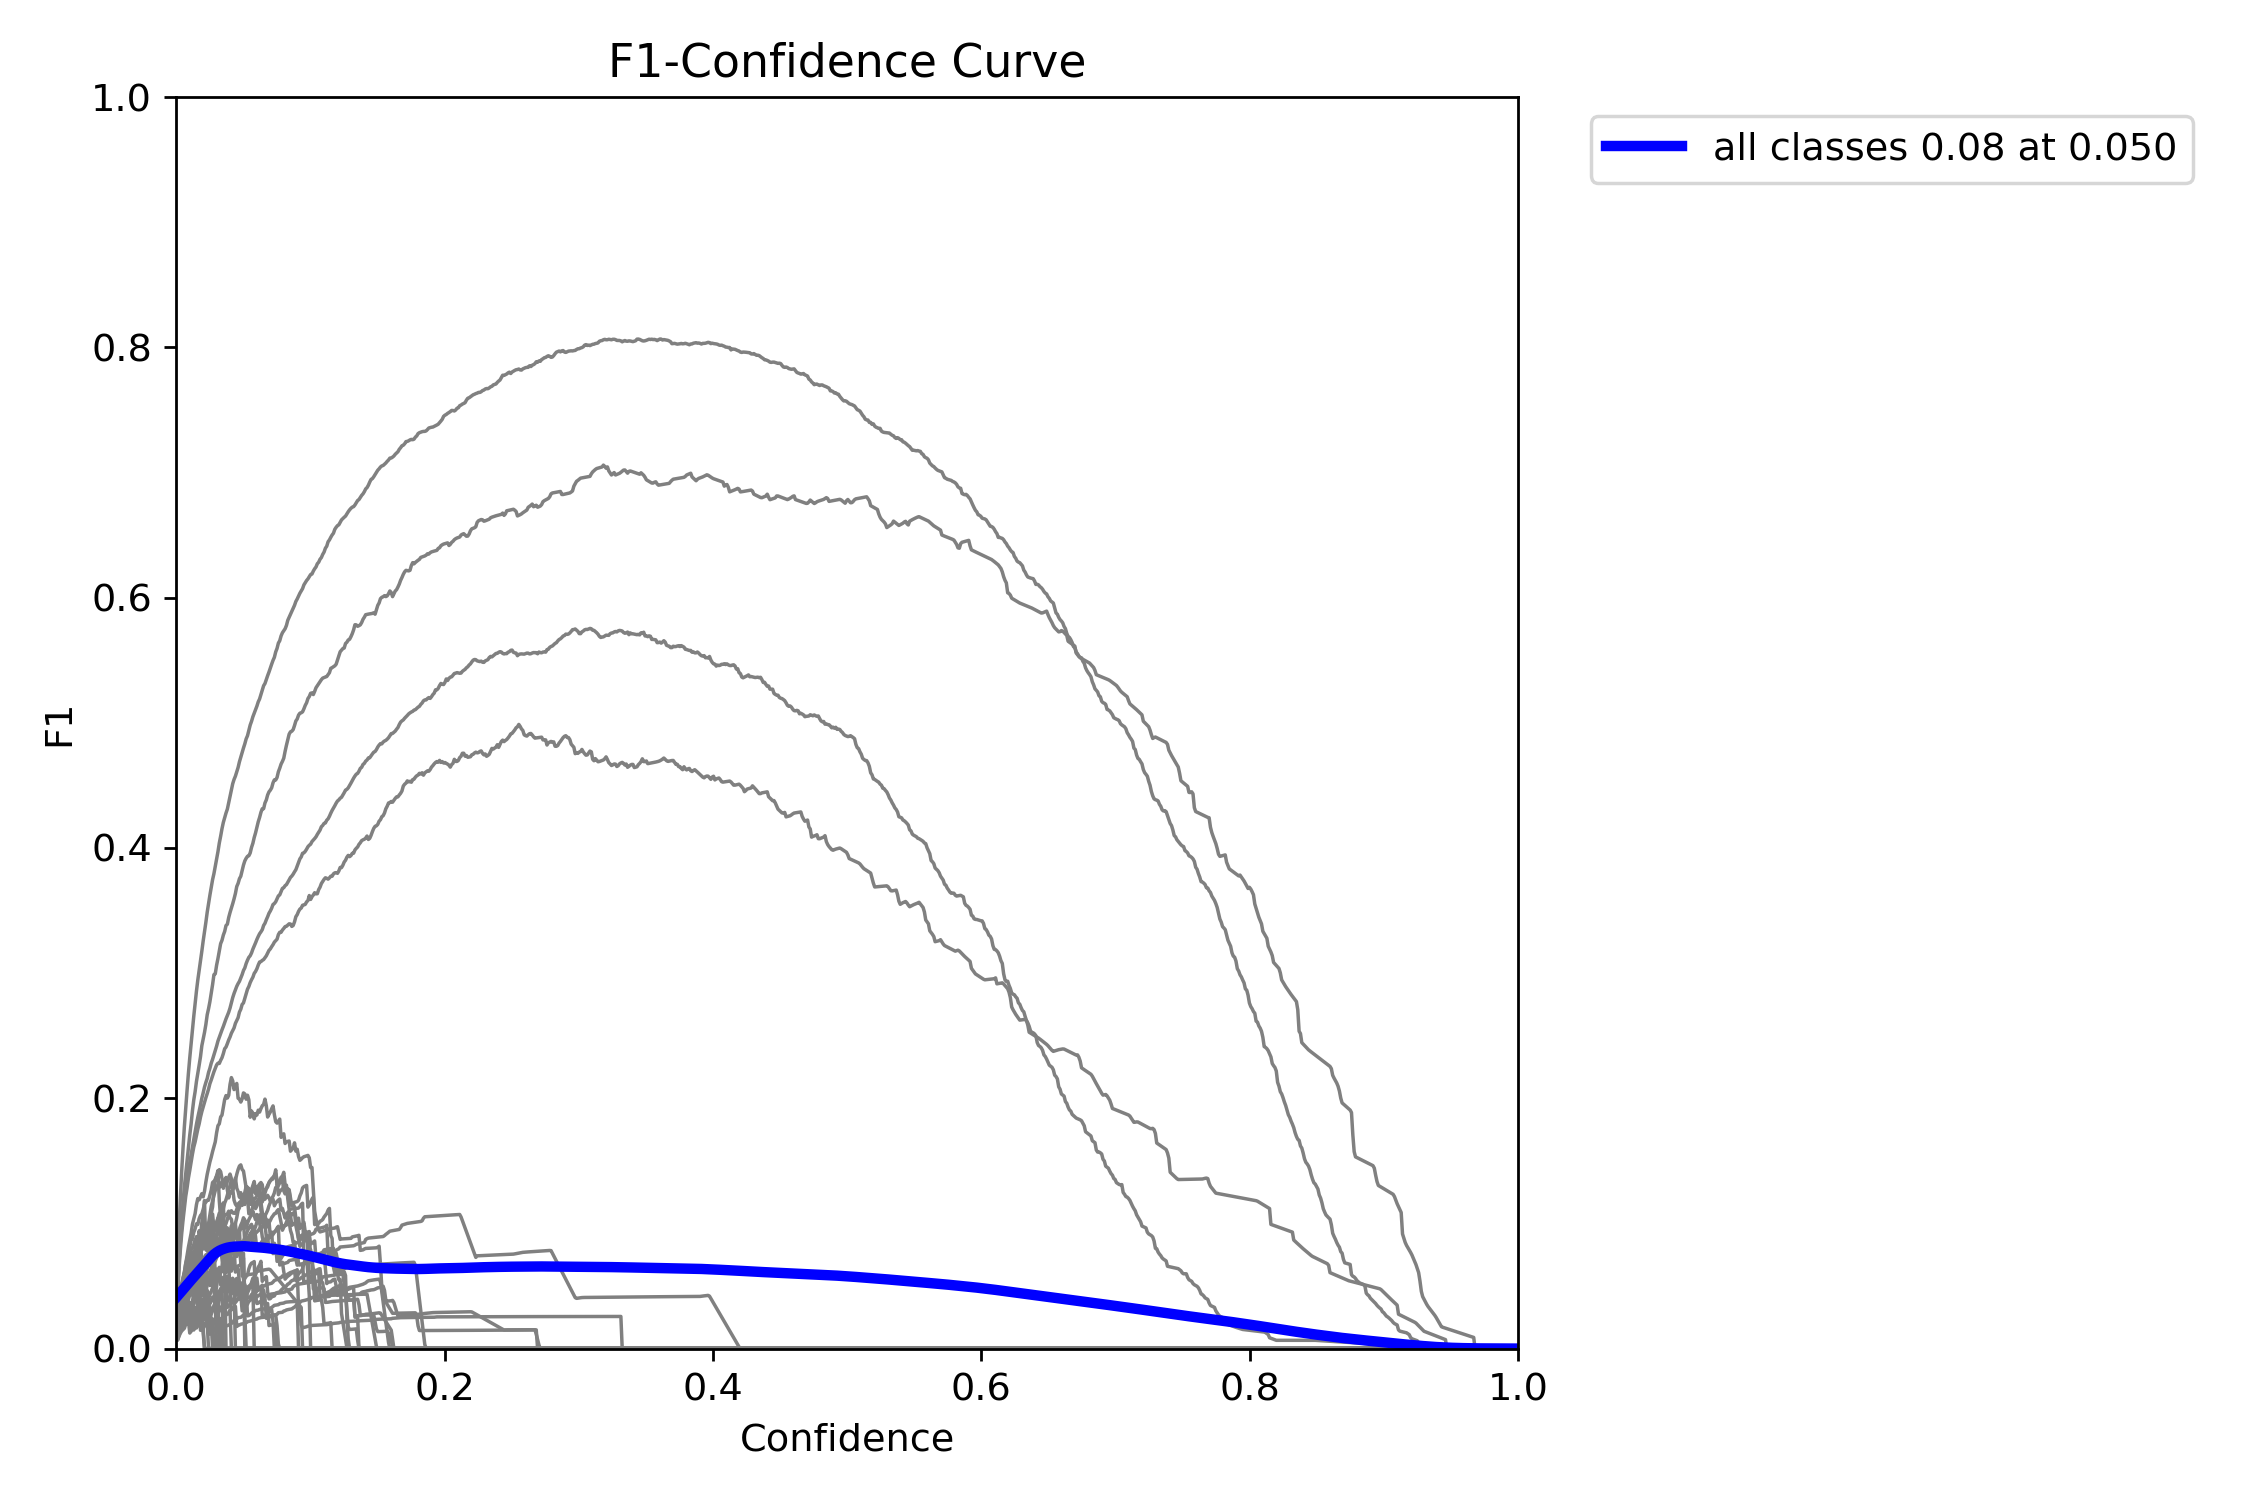

In [8]:
Image("/content/drive/MyDrive/datasets/runs/detect/val/F1_curve.png")

Precision-Confidence curve looks better

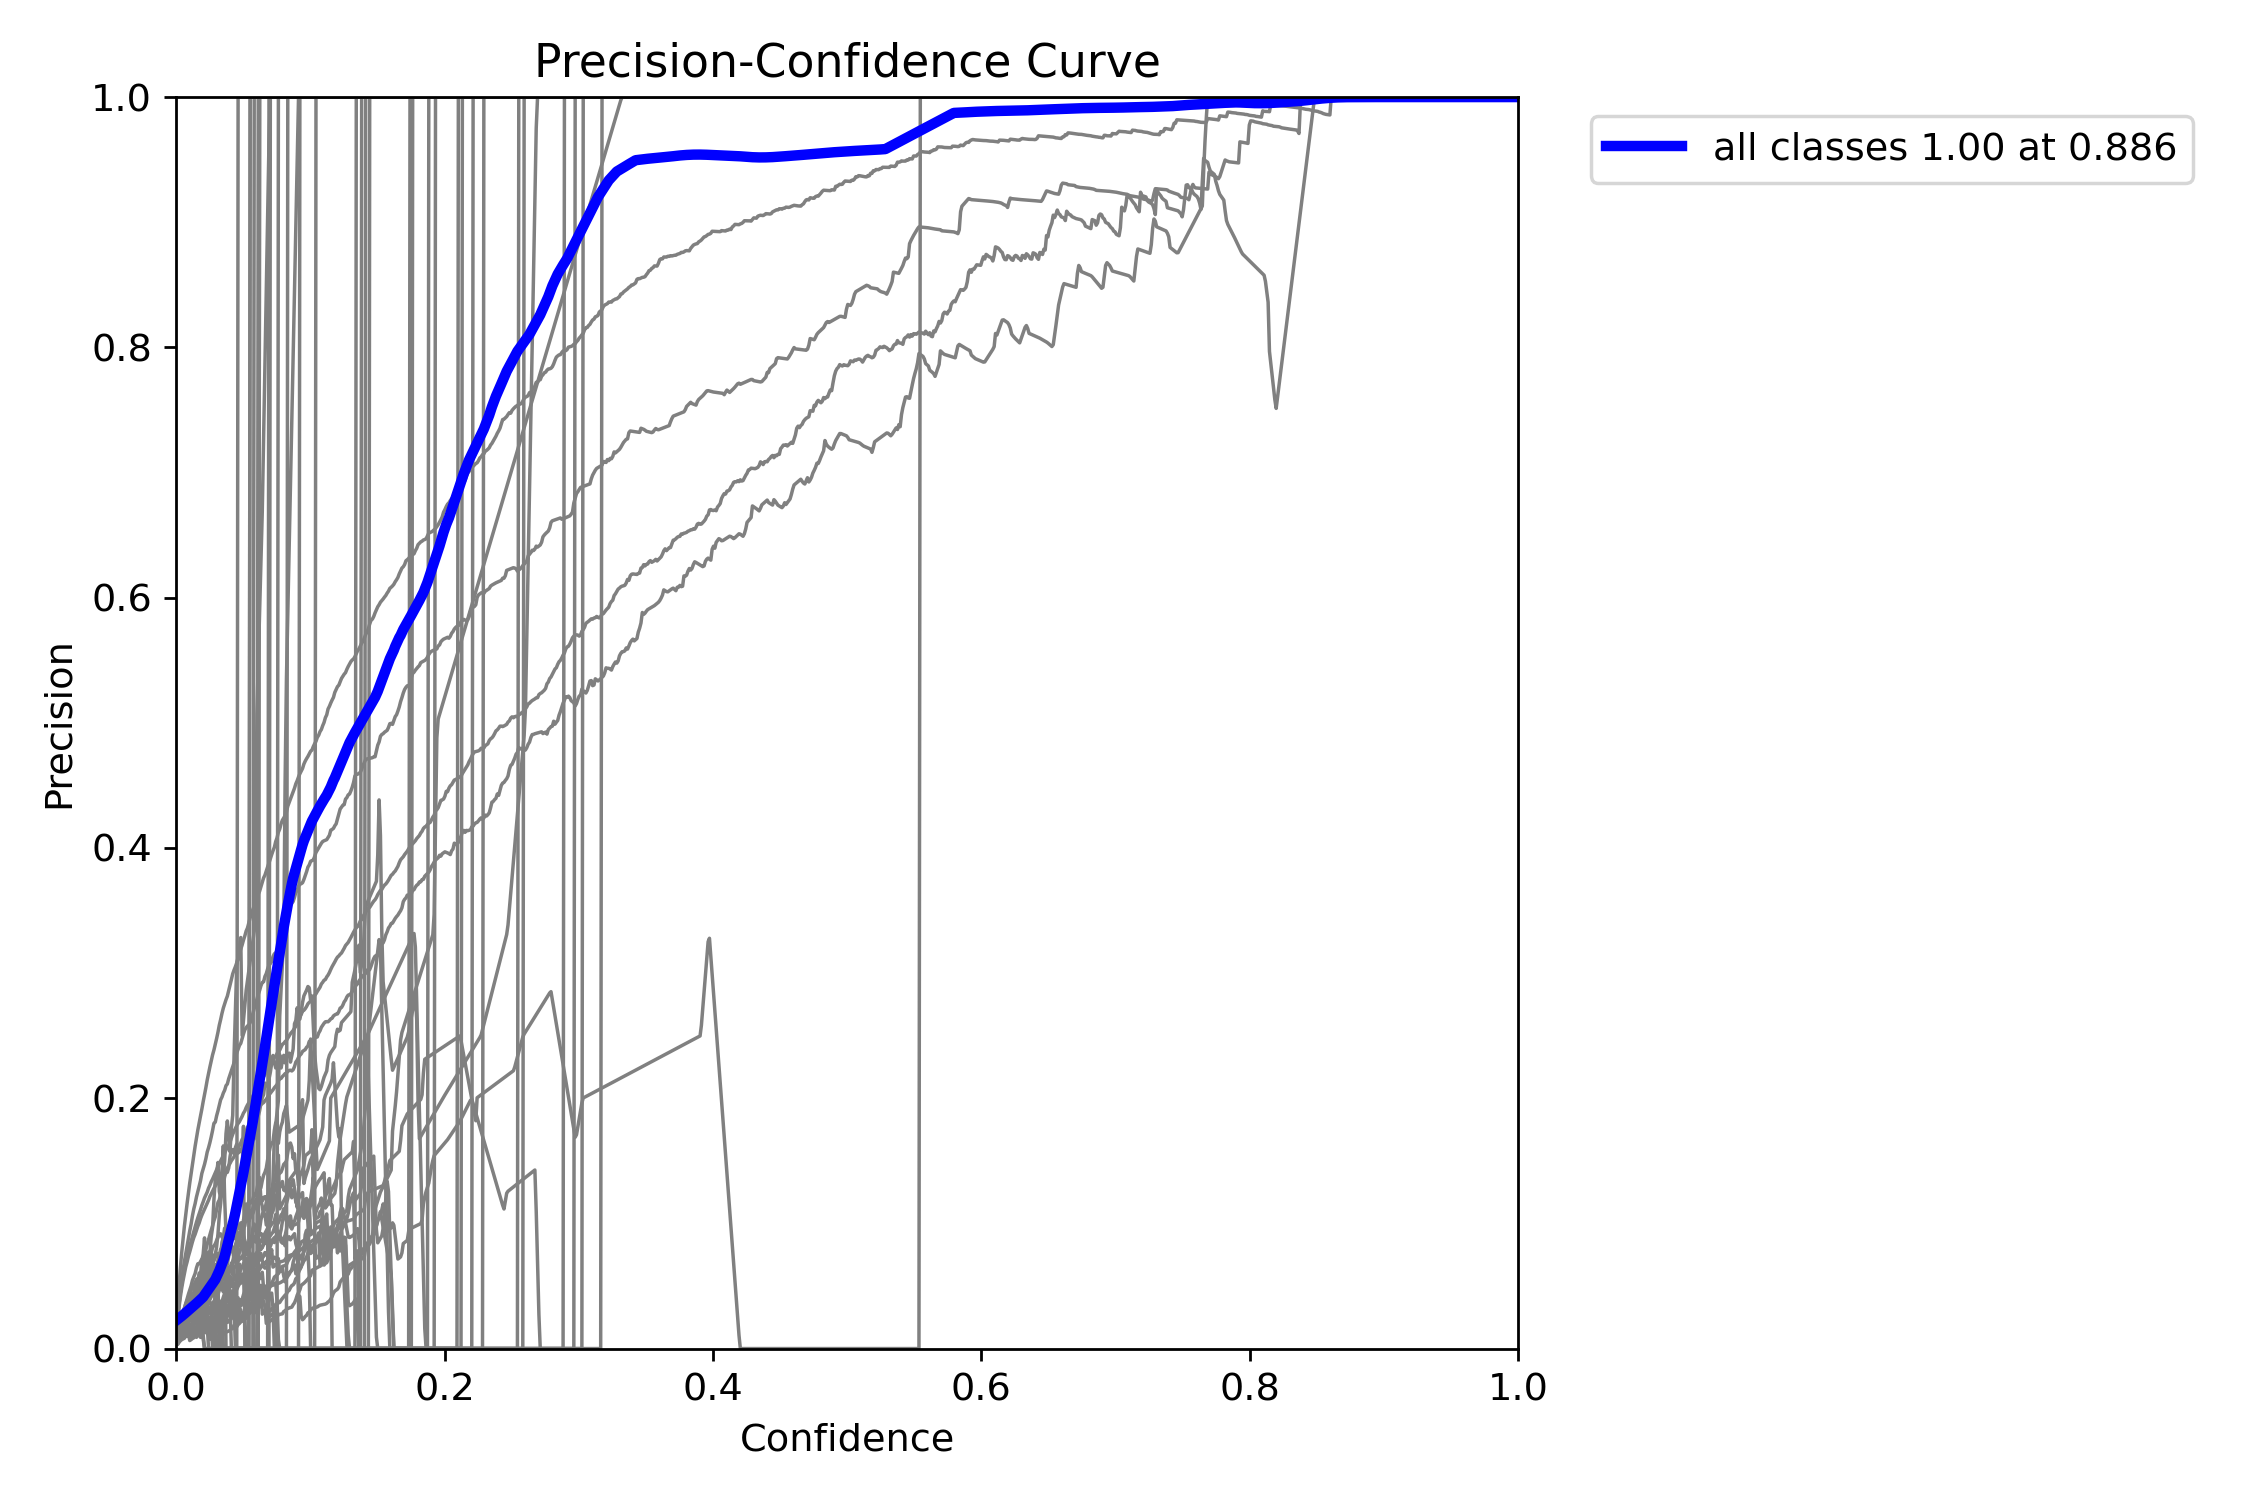

In [9]:
Image("/content/drive/MyDrive/datasets/runs/detect/val/P_curve.png")

Alright this one's funky

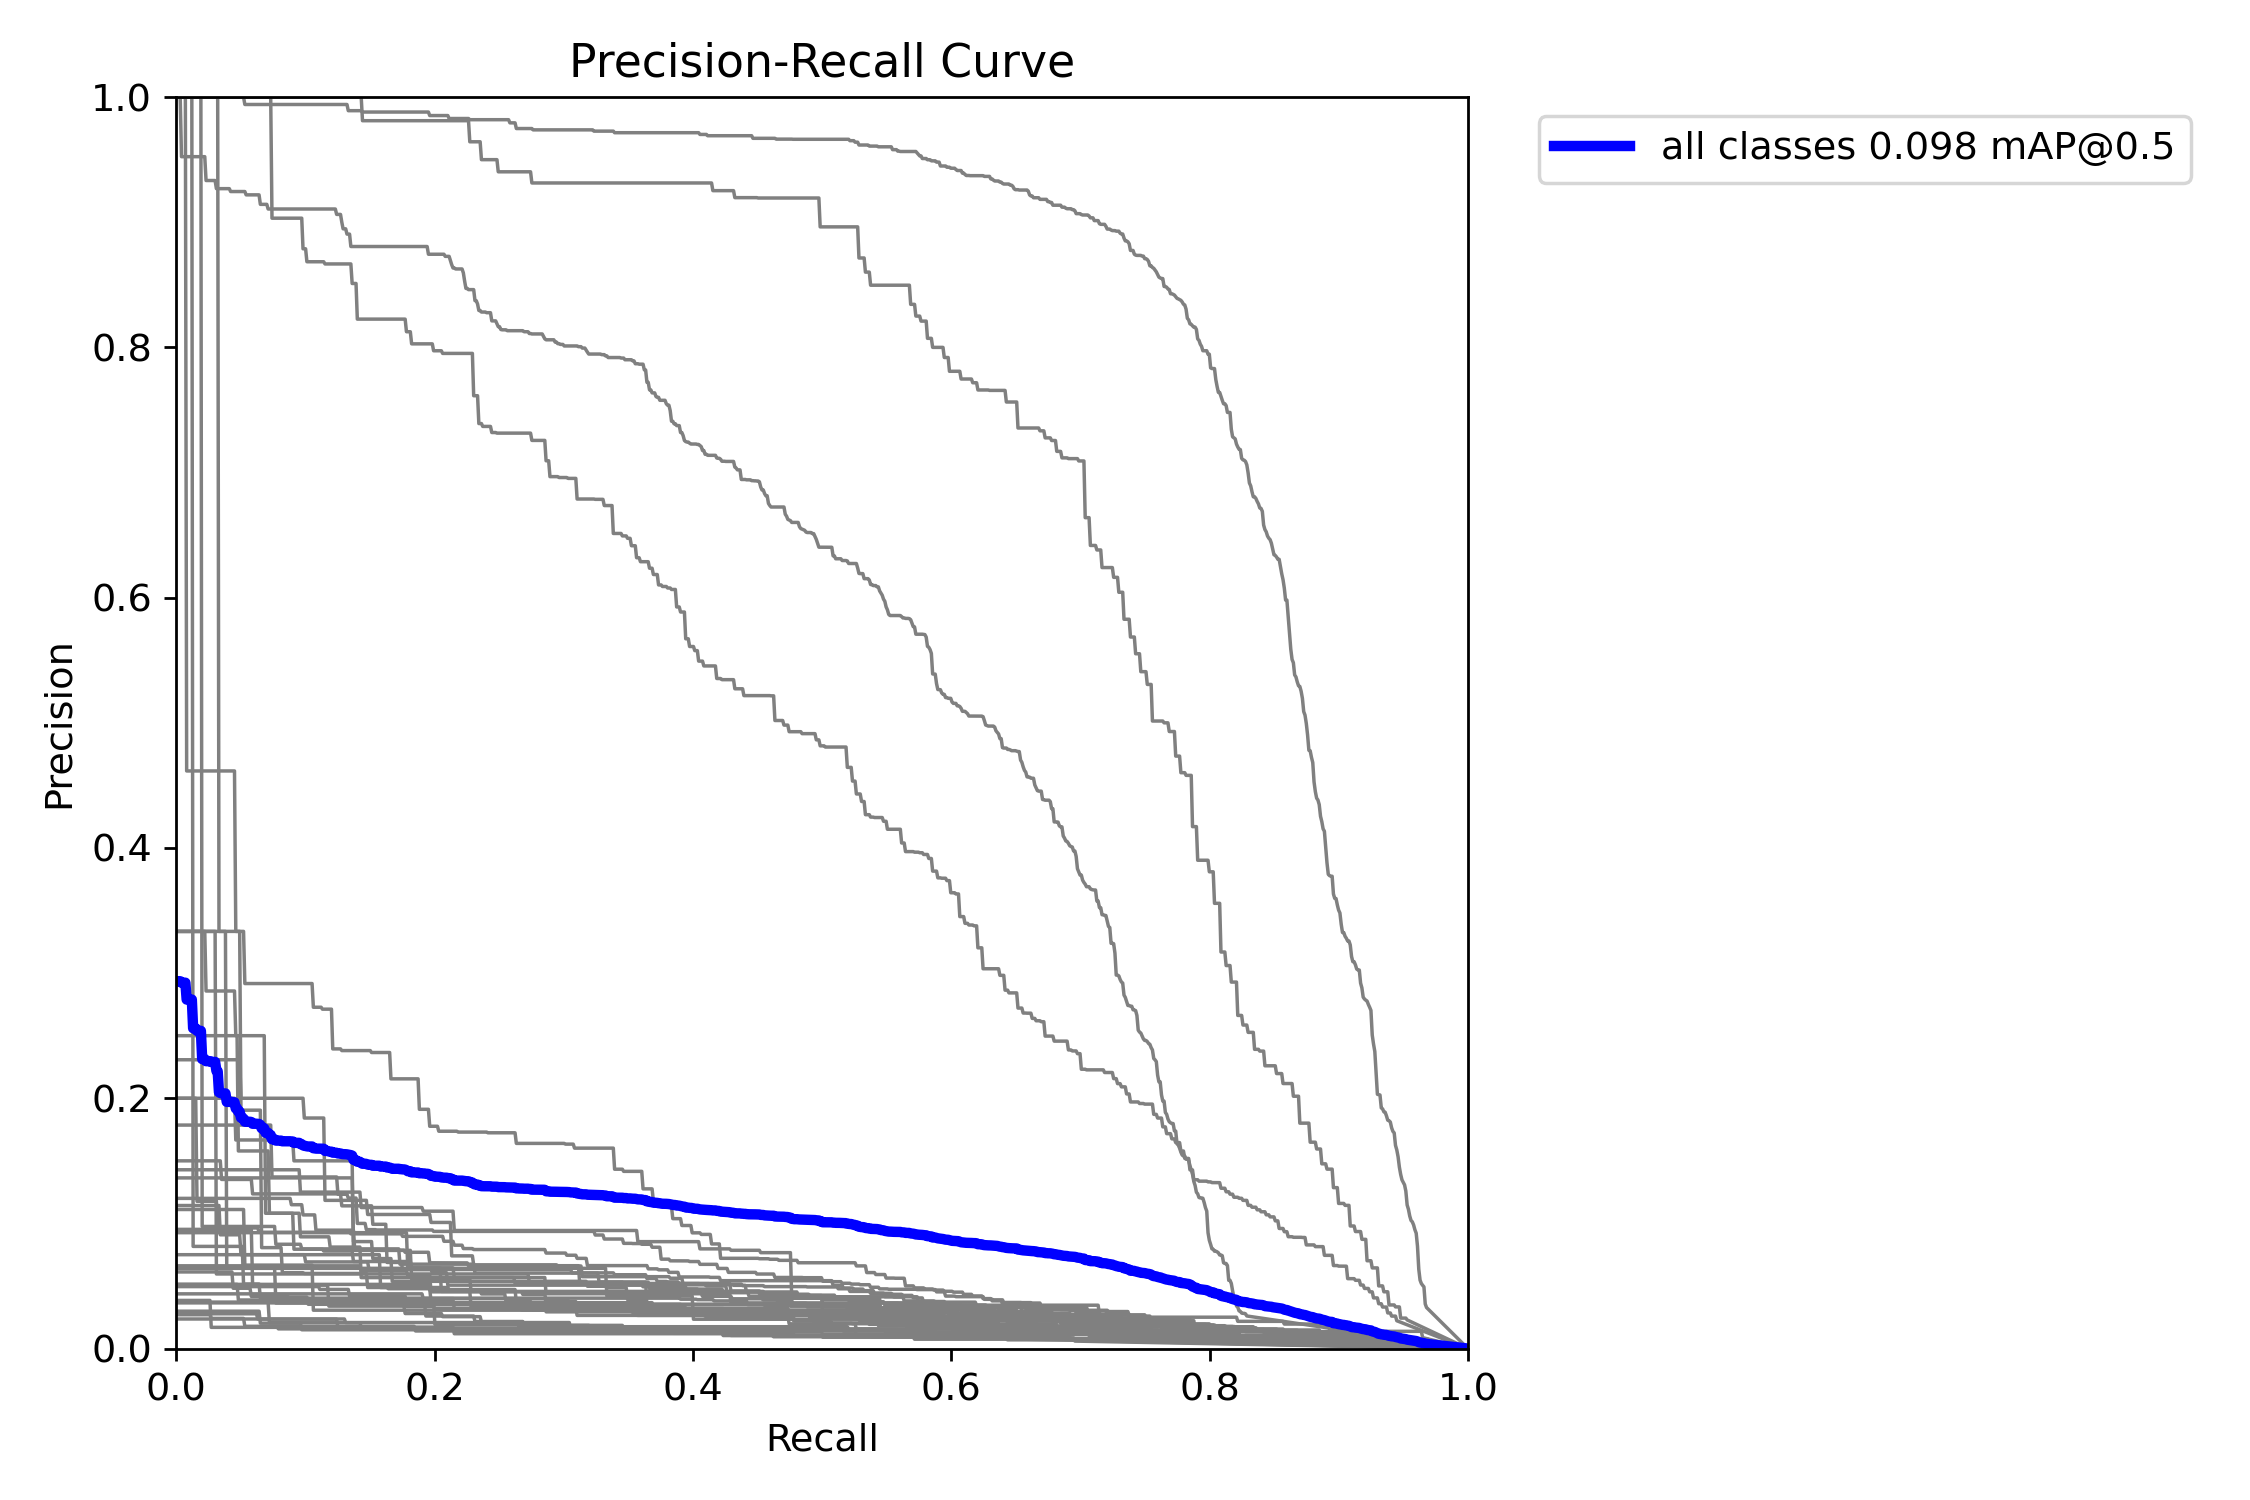

In [10]:
Image("/content/drive/MyDrive/datasets/runs/detect/val/PR_curve.png")

This one is also not great... for now

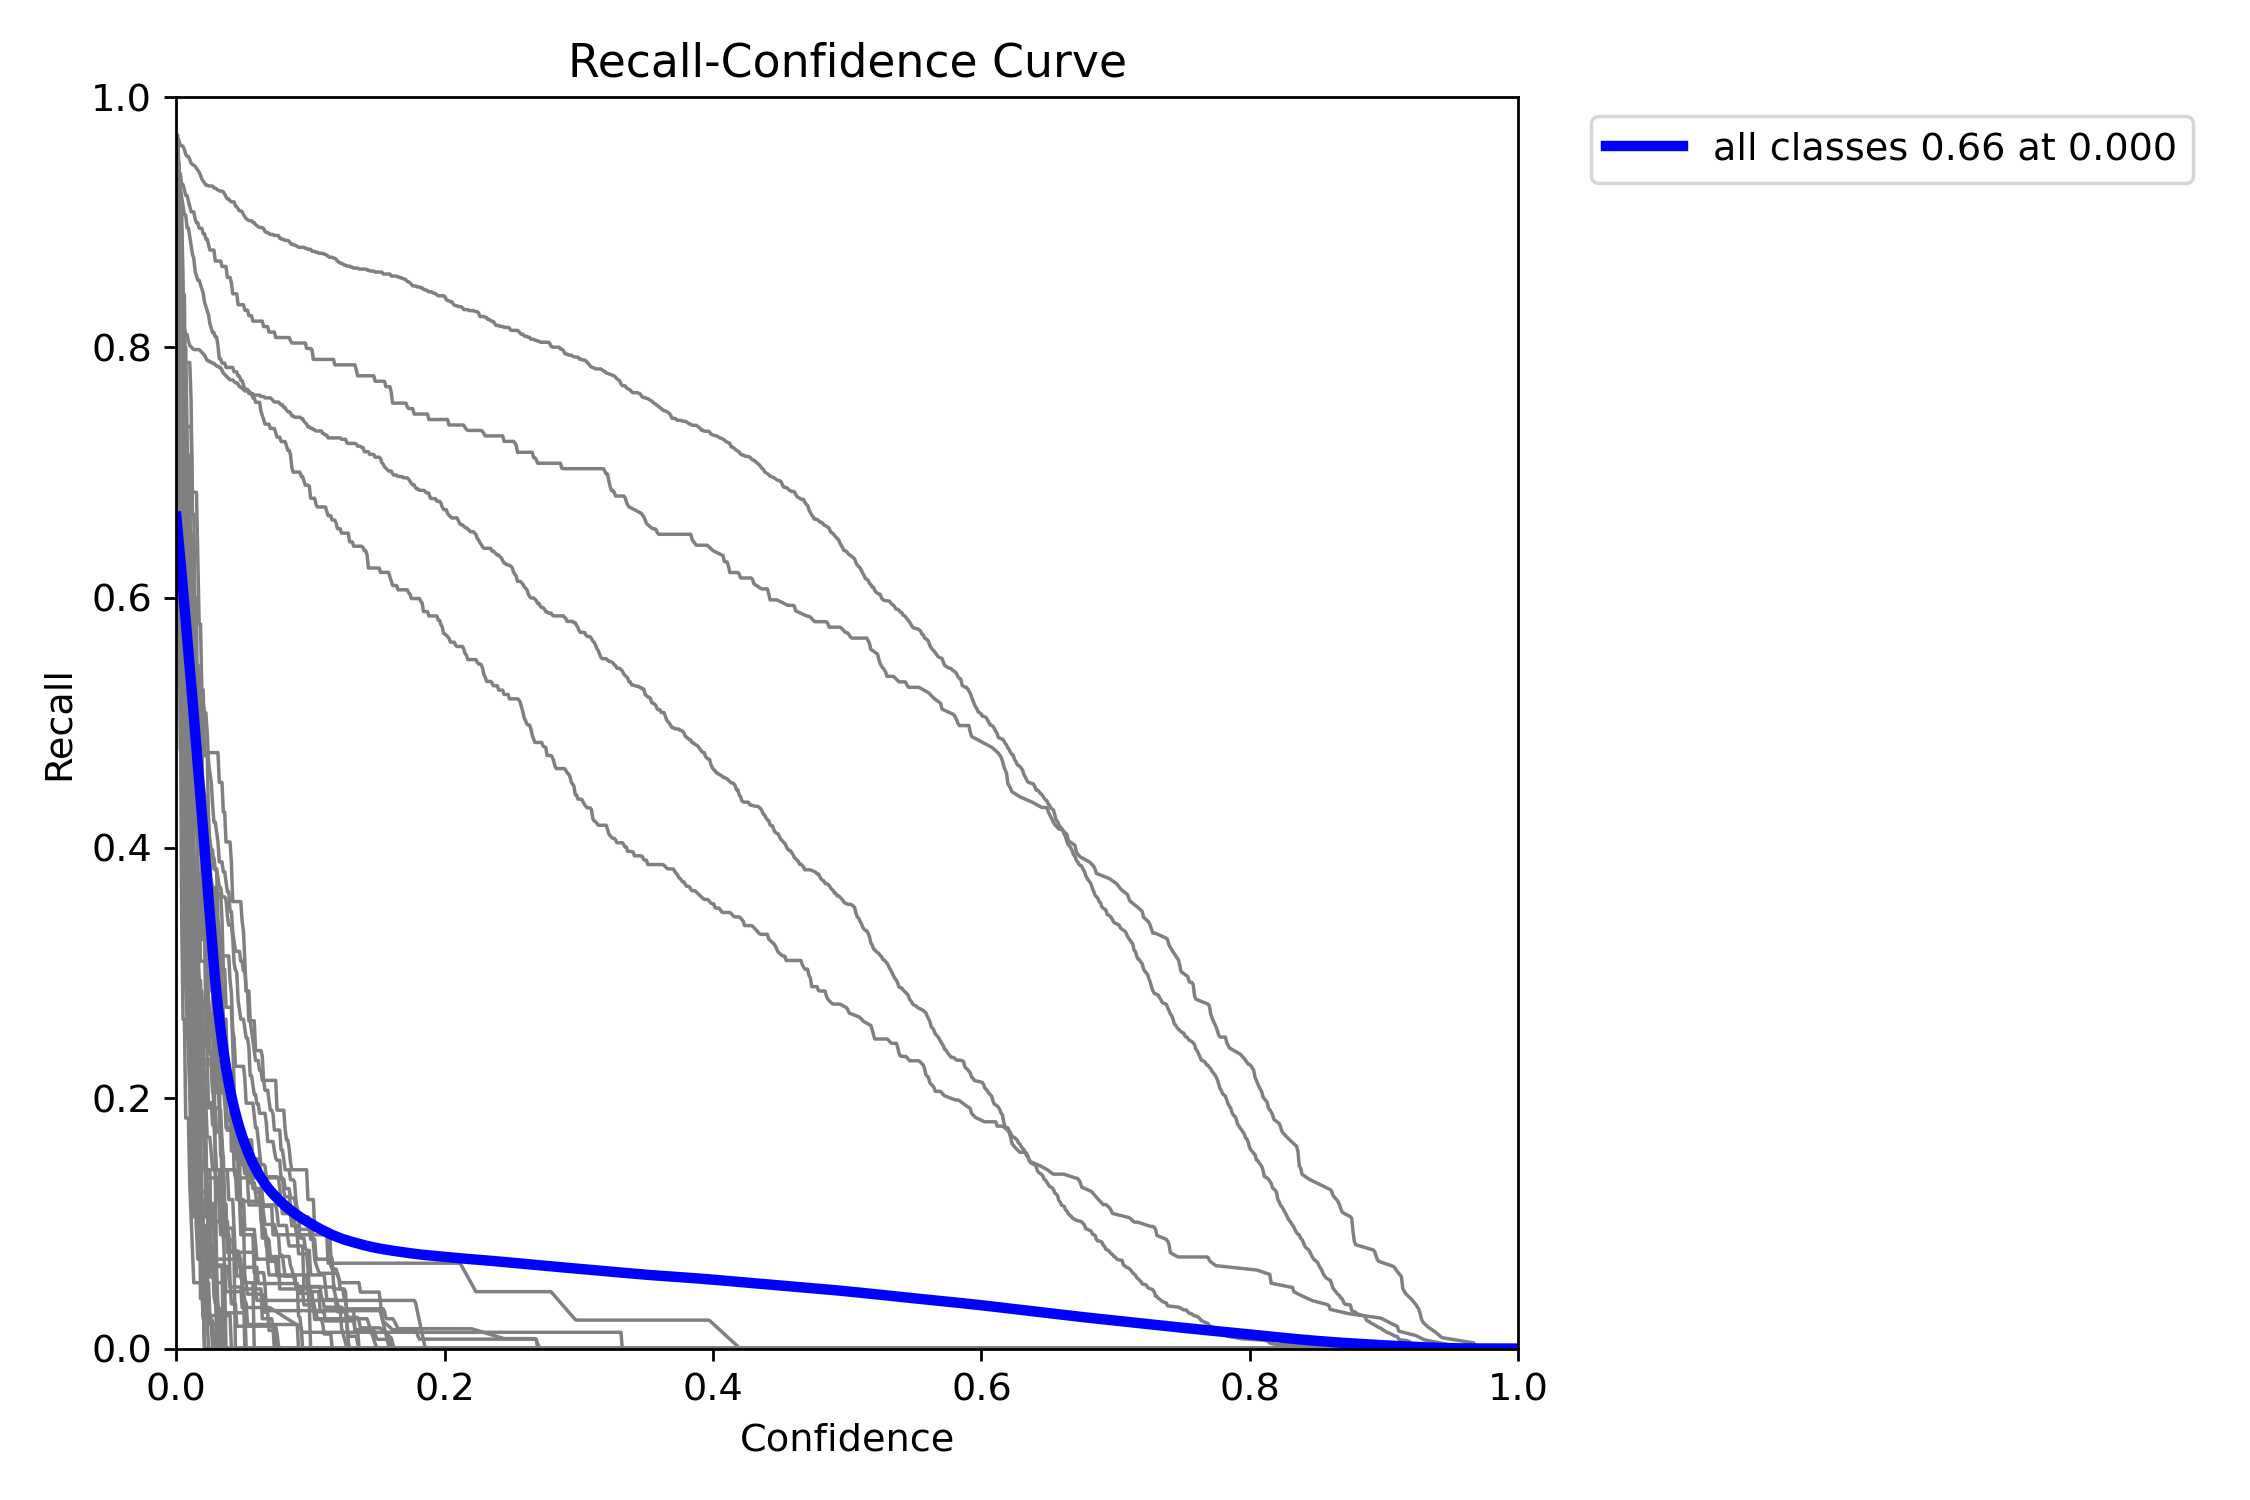

In [11]:
Image("/content/drive/MyDrive/datasets/runs/detect/val/R_curve.png")

Confusion Matrix

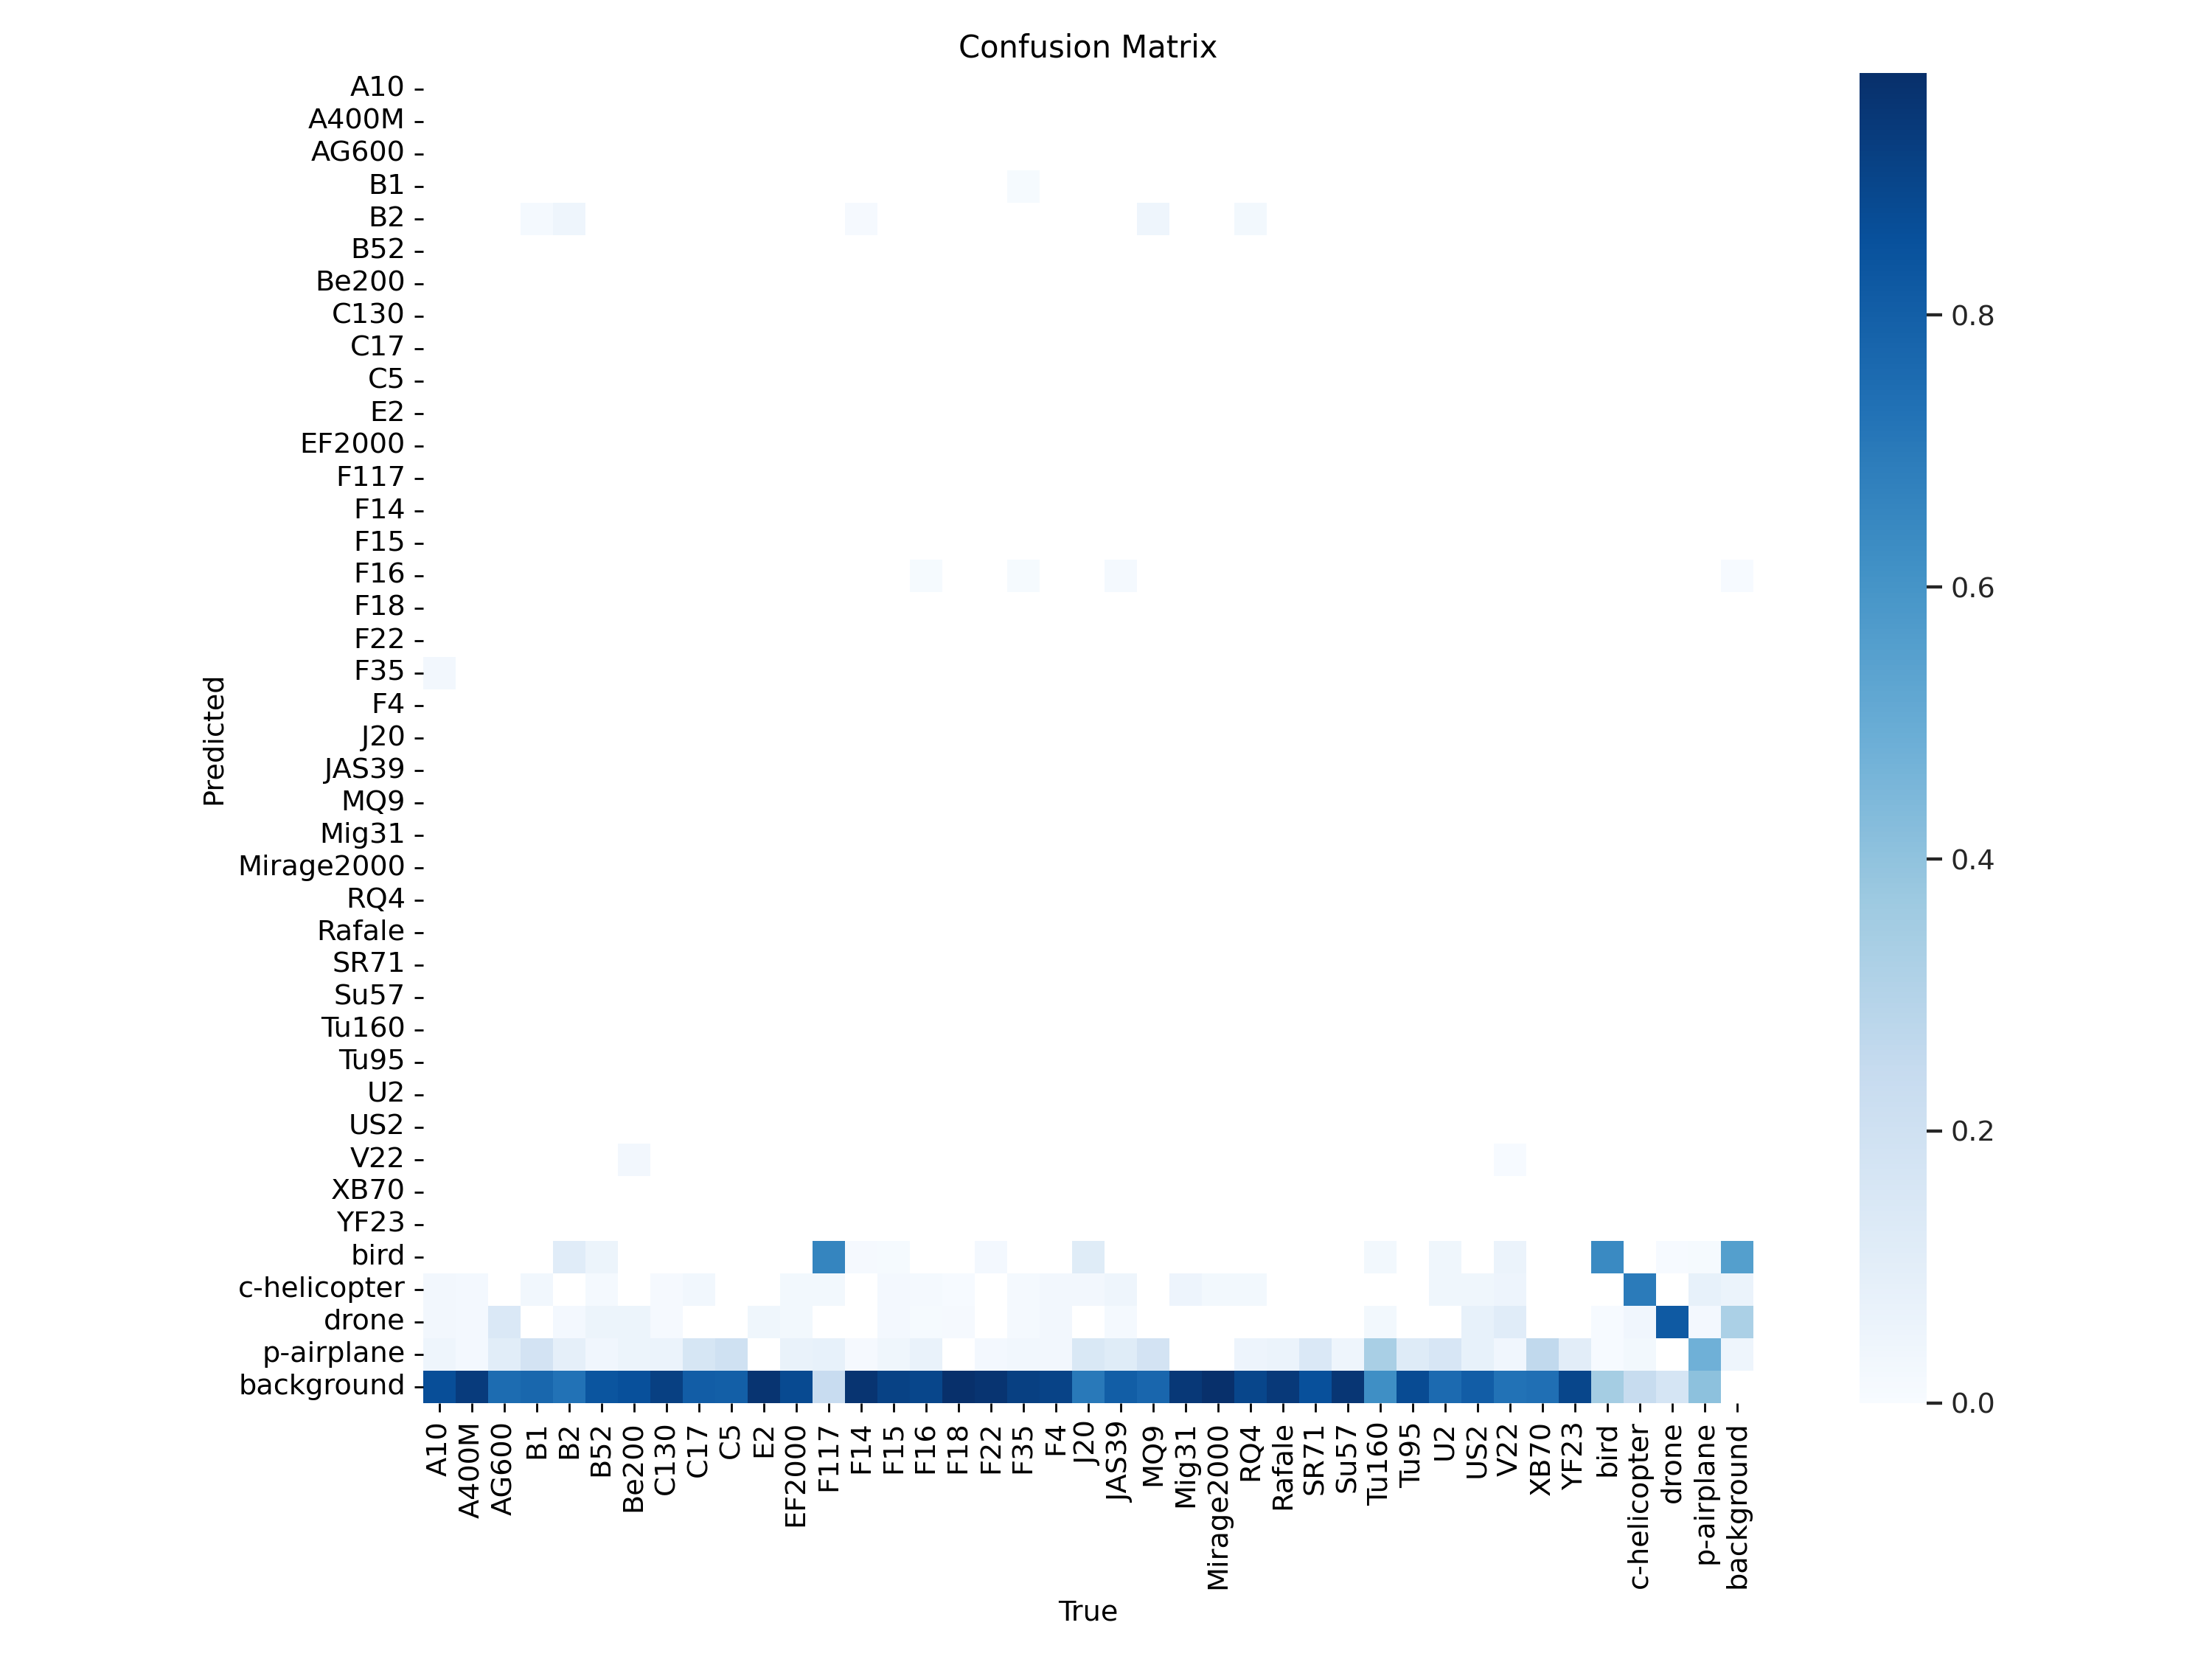

In [18]:
Image("/content/drive/MyDrive/datasets/runs/detect/val/confusion_matrix.png")

# Validation Predictions

### Predictions

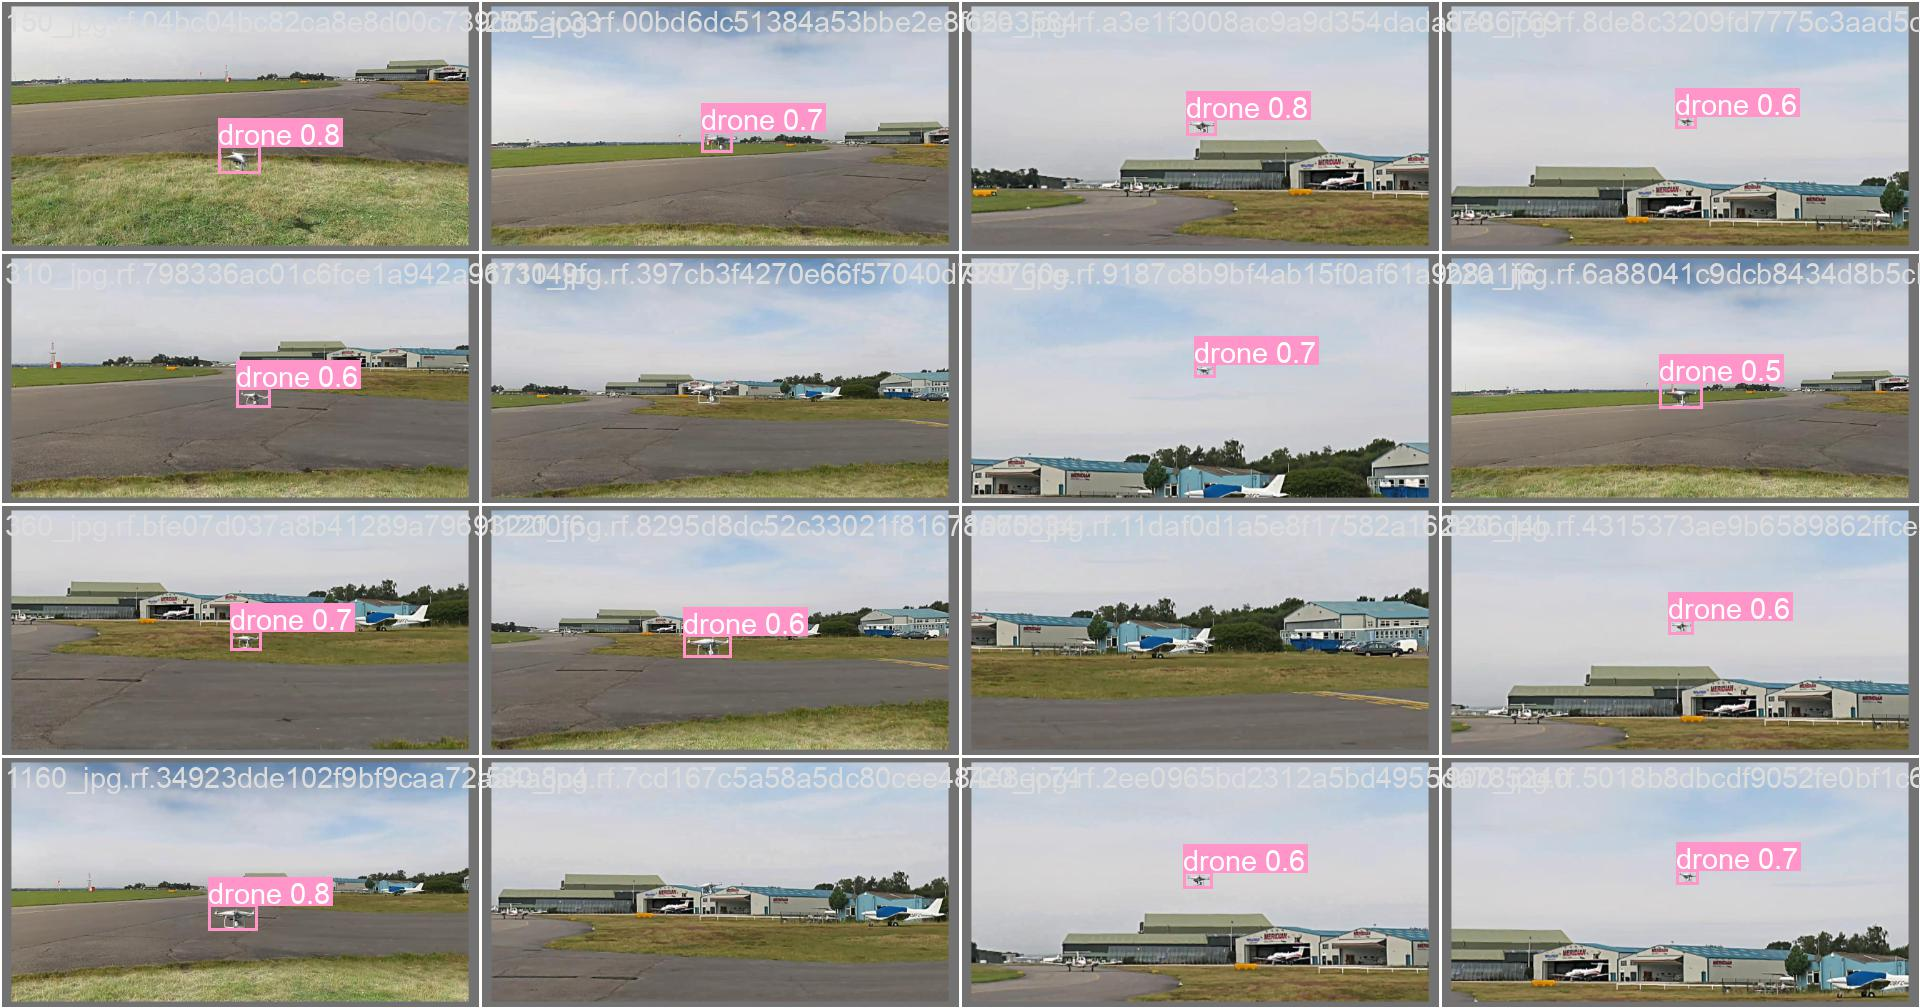

In [13]:
Image("/content/drive/MyDrive/datasets/runs/detect/val/val_batch2_pred.jpg")

### True Labels

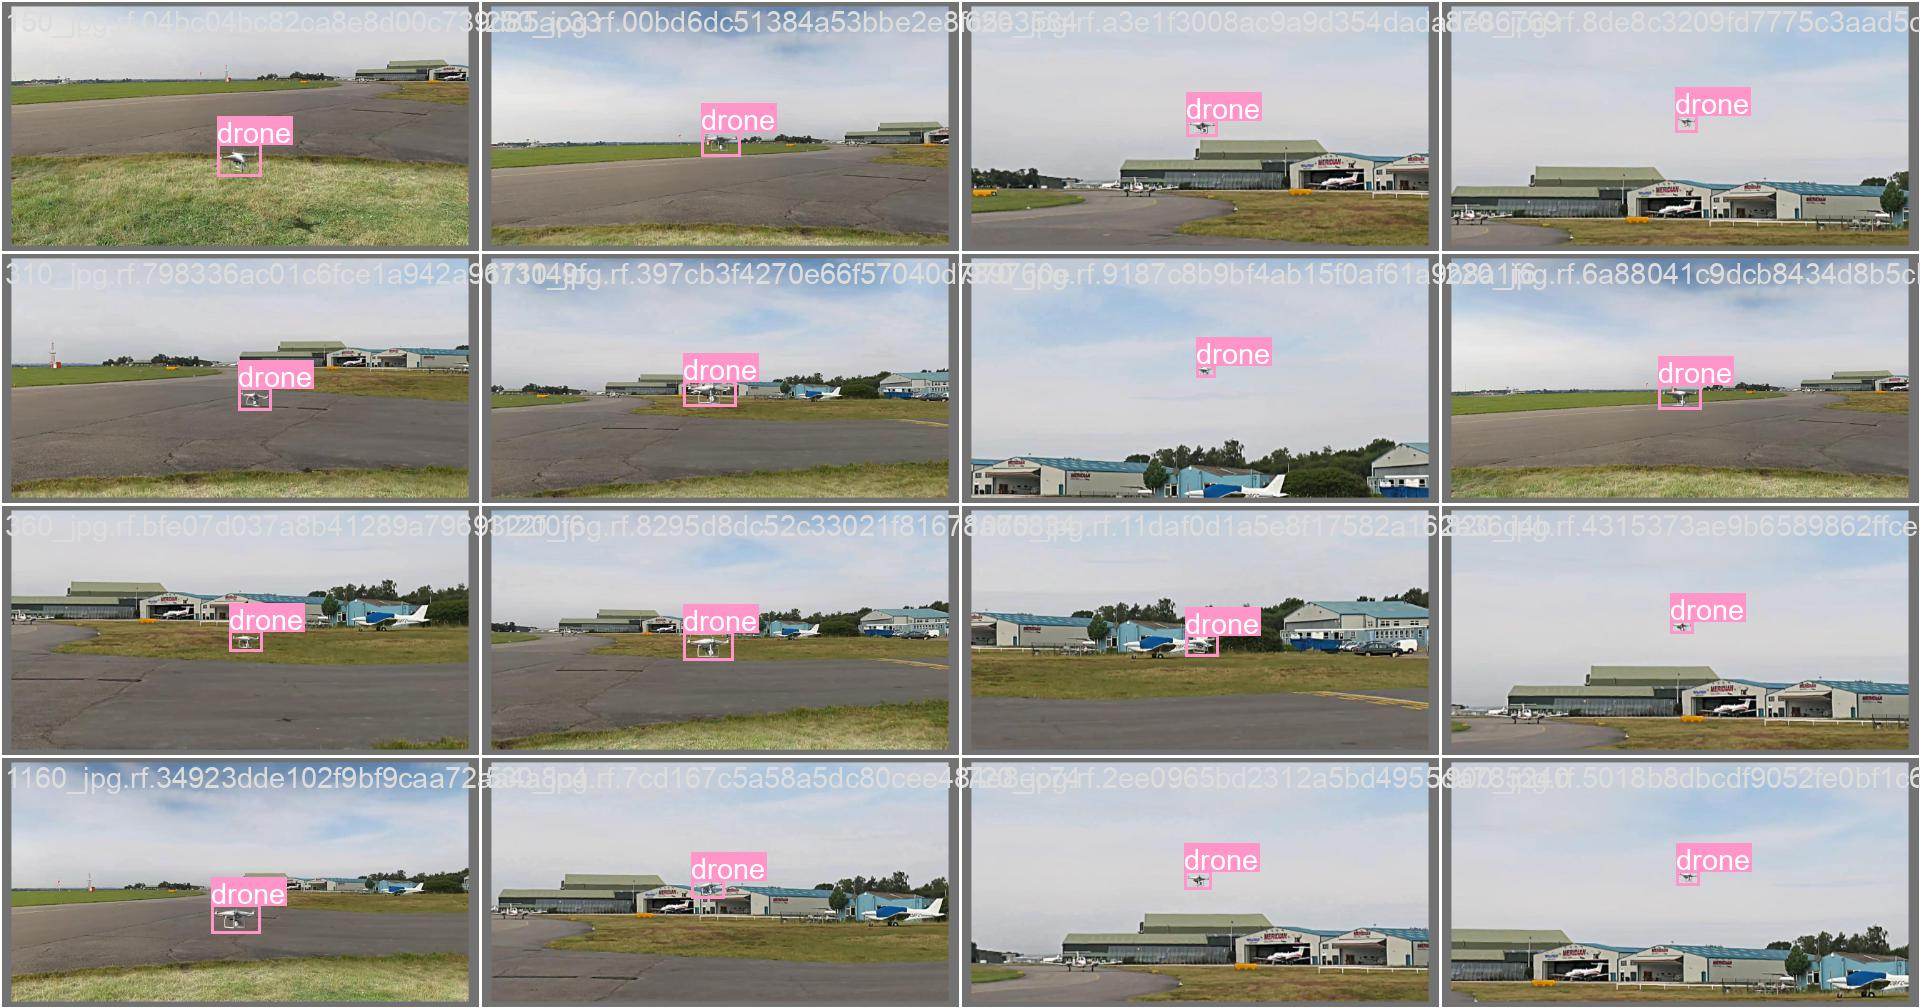

In [14]:
Image("/content/drive/MyDrive/datasets/runs/detect/val/val_batch2_labels.jpg")

Comparing the two, our model was unable to detect objects in 3 of the 16 images. 

[Honestly my eyes were unable to detect them in 2 of the 3 LOL]

### More Predictions

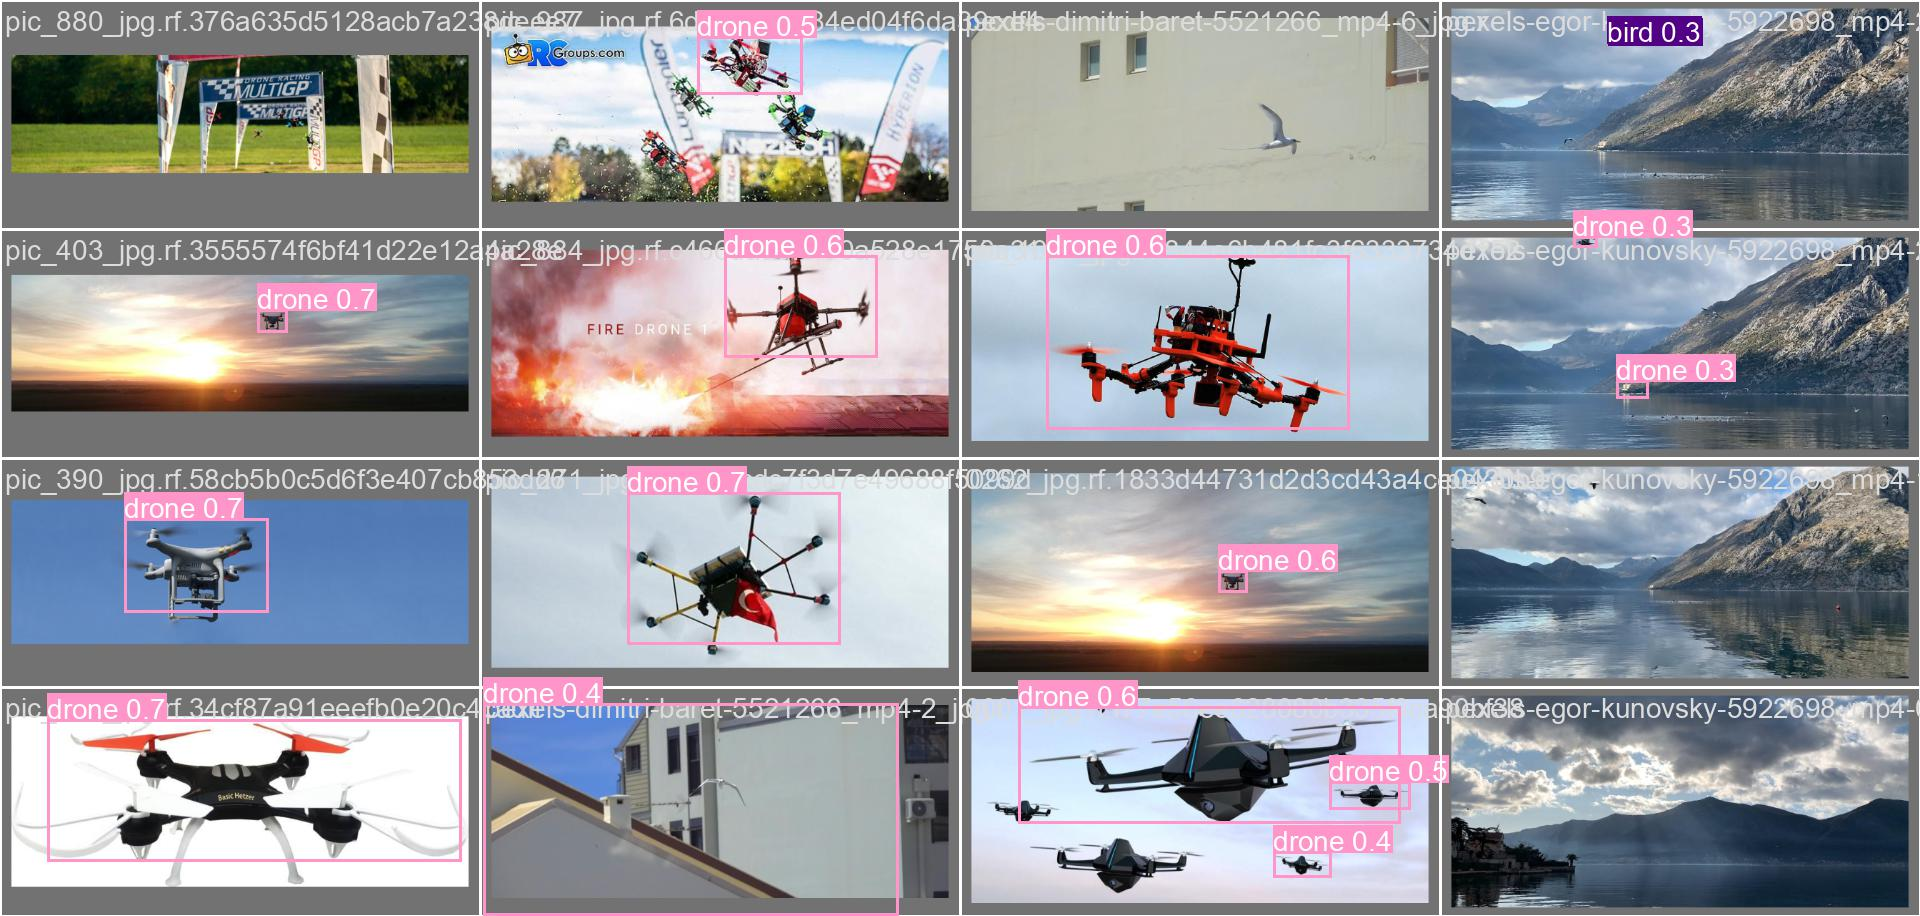

In [15]:
Image("/content/drive/MyDrive/datasets/runs/detect/val/val_batch0_pred.jpg")

### True Labels

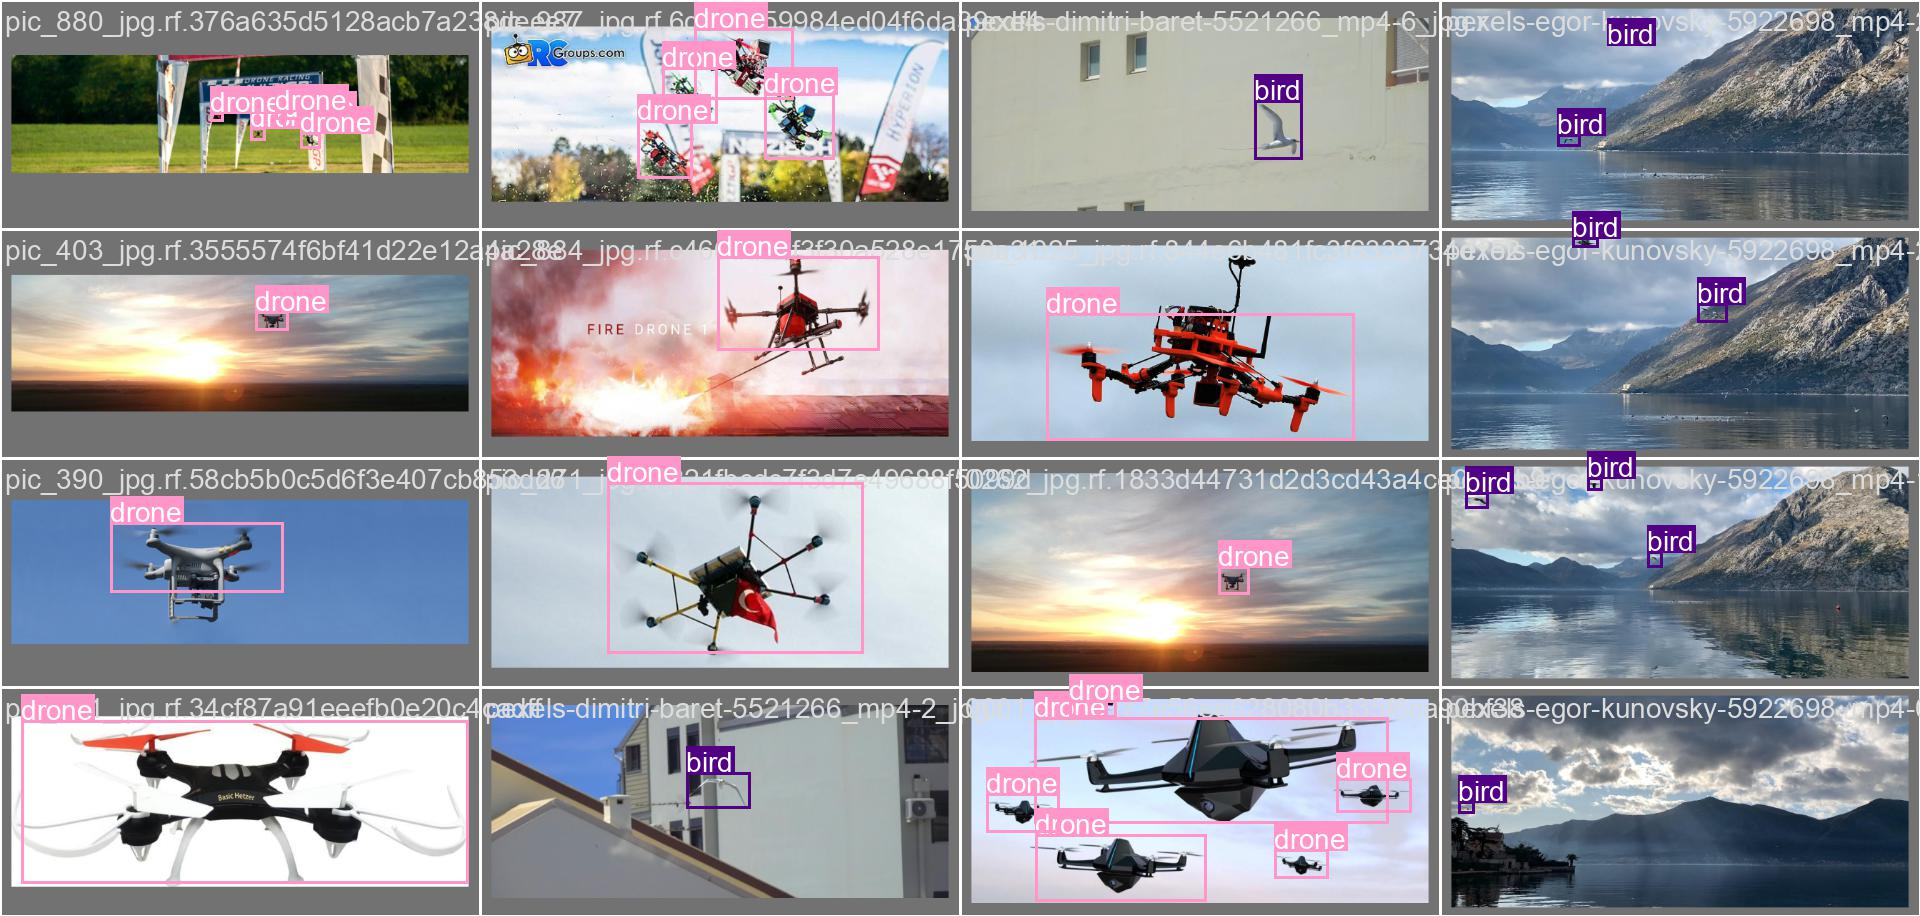

In [16]:
Image("/content/drive/MyDrive/datasets/runs/detect/val/val_batch0_labels.jpg")

It did very poorly regarding the bird class.

[Might have more images generated when trained on more epochs?]